## C S 329E HW7

# Ensemble Methods and Skewed Data

## Michel Gonzalez - mag9989

For this week's homework we are going explore two ensemble methods:

  - AdaBoost, and
  - Random Forests
  
Along with applying different KPIs (key performance indicators) that are more appropriate to highly skewed data sets. 

The dataset contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 237 frauds out of 142,167 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions.

It contains only numerical input variables which are the result of a [PCA transformation](https://en.wikipedia.org/wiki/Principal_component_analysis). Unfortunately, due to confidentiality issues, they cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount in Euros. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

At the end of this homework, I expect you to understand how to train and use ensemble classifiers, how to characterize model performance with ROC curves, and be familiar with the difference between accuracy, true positive rate, and positive predictive value. 

In [1]:
# These are the libraries you will use for this assignment, you may not import anything else
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve

# This is the credit card data provided, we'll use sklearn methods to do cross validation
# to estimate error
df_cc = pd.read_csv('https://www.cs.utexas.edu/~chaney/cc.csv')

## Q1 Parition the data for cross validation

Load the data, and split the data set into $X$ (the feature dataframe, `df_X`) and $y$ (the target series `s_y`). Define our partitions.  

We know this is a _super_ skewed data set, so we worry about our target class being underrepresented in a random k-fold selection. With this in mind, we use a [stratifed k-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html), since it will preserve our class balance in our experiements. Use $k=3$, . Instantiate an instance of the `StratifiedKFold` class, and use the generator `split` to populate the following dictonaries:
   - `d_train_df_X` : where the key is the fold number, and the value is the attribute training dataframe at that fold
   - `d_test_df_X`  : where the key is the fold number, and the value is the attribute test dataframe at that fold
   - `d_train_s_y`  : where the key is the fold number, and the value is the target training series at that fold
   - `d_train_s_y`  : where the key is the fold number, and the value is the target test series at that fold

In [2]:
df_X = df_cc.drop(columns=['Class'])
s_y = df_cc['Class']

In [3]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=23)

In [4]:
d_train_df_X = dict()
d_test_df_X = dict()
d_train_s_y = dict()
d_test_s_y = dict()

# Your code here

# use i to keep track of the fold number and
# fills the dictionaries with the appropriate
# data

i = 1

for train_index, test_index in skf.split(df_X, s_y):
  
    d_train_df_X[i] = df_X[df_X.index.isin(train_index)]
    d_test_df_X[i] = df_X[df_X.index.isin(test_index)]
    d_train_s_y[i] = s_y[s_y.index.isin(train_index)]
    d_test_s_y[i] = s_y[s_y.index.isin(test_index)]

    i+=1

In [5]:
# Look at the test data and verify that the target training is equally distributed as possible
for key in d_test_s_y.keys():
    print(d_test_s_y[key].value_counts())

0    47389
1       79
Name: Class, dtype: int64
0    47389
1       79
Name: Class, dtype: int64
0    47389
1       79
Name: Class, dtype: int64


## Section 1 - AdaBoost

# Q2 Test the Performance of AdaBoost

When we talked about AdaBoost in class, we used a collection of "Decision Stumps". In this assignment, we will use the implementation of [AdaBoost in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html).  As you browse the documentation, you will notice that the default base esimator in this implentation is a `DecisionTreeClassifier(max_depth=1)` (our friend the decision stump). 

After you fit an AdaBoost model, you can call the method `predict` to get a class prediction, or you can call `predict_proba` to get the probability of being in the class `0` or the class `1`. These probabilities are used when creating ROC curves. 

Loop over the $k$ folds using the dictionaries from the first problem, and for each fold calculate the accuracy, TPR, the PPV, and the FPR (feel free to create helper functions to calcuate these metrics - do not use a library function to compute these metrics).  Plot the ROC curve for each fold. You may use the [plot roc curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html) from Scikit-learn.  There is a great example in the documentation [on plotting ROC curves in cross validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html) that is helpful.  

When creating your AdaBoost classifier, please use the following parameters: 
`AdaBoostClassifier(n_estimators=25, random_state=23)`

Save the predictions from the 3rd fold into a variable called `y_hat_ab` for use in a future problem.


In [6]:
k = 3
acc_ab = np.zeros(k)
tpr_ab = np.zeros(k)
ppv_ab = np.zeros(k)
fpr_ab = np.zeros(k)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

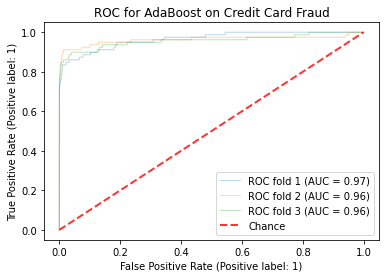

In [7]:
# your code here

fig, ax = plt.subplots()

for i in range(1, k + 1):

  actual = np.array(d_test_s_y[i])

  clf_ada = AdaBoostClassifier(n_estimators=25, random_state=23)

  clf_ada = clf_ada.fit(d_train_df_X[i], d_train_s_y[i])

  expected_ada = clf_ada.predict(d_test_df_X[i])

  # total number of positives in expected

  tp_ada = 0

  tn_ada = 0

  # Accuracy

  acc_ada = sum(expected_ada == actual) / len(actual)

  acc_ab[i - 1] = acc_ada

  # TPR = tp/(tp + fn)

  # I can use tn to find the the number of false positive 
  # by summing all the expected postives and finding the total
  # I subtracting it by the number of true positives
  # fp = Tp - tp, where Tp is total positives
  # similarly we can find the number of false negative
  # by subtracting the number of true negatives from the total number
  # of negatives
  # fn = Tn  - tn, where Tn is total number of negative predicitons

  for j in range(0, len(actual)):

    # finds the counts of true positives
    
    if(expected_ada[j] == 1 & actual[j] == 1):
      
      tp_ada += 1

    elif(expected_ada[j] == 0 & actual[j] == 0):

      tn_ada += 1  

  Tn_ada = sum(expected_ada == 0)

  fn_ada = Tn_ada - tn_ada

  tpr_ada = tp_ada / (tp_ada + fn_ada)

  tpr_ab[i - 1] = tpr_ada

  # PPV

  fp_ada = sum(expected_ada == 1) - tp_ada

  ppv_ada = tp_ada / (tp_ada + fp_ada)

  ppv_ab[i - 1] = ppv_ada

  # FPR

  fpr_ada = fp_ada / (fp_ada + tn_ada)

  fpr_ab[i - 1] = fpr_ada

  # grabs the third fold predicited data

  if (i == 3):

    y_hat_ab = expected_ada

  # plots the ROC plots for eahc fold
  
  viz = plot_roc_curve(
        clf_ada,
        d_test_df_X[i],
        d_test_s_y[i],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="ROC for AdaBoost on Credit Card Fraud",
)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

ax.legend(loc="lower right")

plt.show()

In [8]:
print('The min, mean, and max TPR are: {:.2f}, {:.2f}, and {:.2f}'.format(tpr_ab.min(), tpr_ab.mean(), tpr_ab.max()))
print('The min, mean, and max PPV are: {:.2f}, {:.2f}, and {:.2f}'.format(ppv_ab.min(), ppv_ab.mean(), ppv_ab.max()))
print('The min, mean, and max ACC are: {:.2f}, {:.2f}, and {:.2f}'.format(acc_ab.min(), acc_ab.mean(), acc_ab.max()))

The min, mean, and max TPR are: 1.00, 1.00, and 1.00
The min, mean, and max PPV are: 0.75, 0.79, and 0.82
The min, mean, and max ACC are: 1.00, 1.00, and 1.00


## Q3 Test the Performance of Random Forests

Now, let's try another ensemble method: Random Forests, again using the [Scikit-learn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

Following our book, we will build complete trees, with no pruning.  That means every leaf in the tree will be completelely pure, and if you exam an individual Decision Tree it would be overtrained to our training set.  While building the decision trees, at every internal node, we select $p$ attributes at random, and then find the best split that minimizes impurtity.  The value, $p$, is a hyperparamter of the Random Forest and corresponds to the `max_features` parameter in the Random Forest Class. 

After you fit an RandomForest model, you can call the method `predict` to get a class prediction, or you can call `predict_proba` to get the probability of being in the class `0` or the class `1`. These probabilities are used when creating ROC curves. 

Loop over the $k$ folds using the dictionaries from the first problem, and for each fold calculate the accuracy, TPR, the PPV, and the FPR (feel free to reuse the functions that you already wrote to calculate these values - do not use a library function to compute these metrics).  Plot the ROC curve for each fold. You may use the [plot roc curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html) from Scikit-learn. There is a great example in the documentation [on plotting ROC curves in cross validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html) that is helpful.  

When creating your Random Forest classifier, please use the following parameters: 
`RandomForestClassifier(criterion="entropy", max_features="sqrt", random_state=23)`

Save the predictions from the 3rd fold into a variable called `y_hat_rf` for use in a future problem.

In [9]:
k = 3
acc_rf = np.zeros(k)
tpr_rf = np.zeros(k)
ppv_rf = np.zeros(k)
fpr_rf = np.zeros(k)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

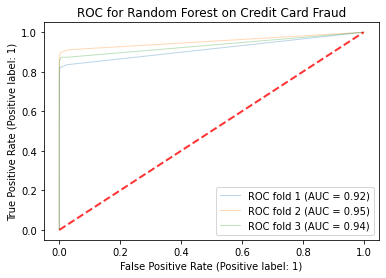

In [10]:
# your code here
fig, ax = plt.subplots()

# 
for i in range(1, k + 1):

  actual = np.array(d_test_s_y[i])

  clf_ran = RandomForestClassifier(criterion="entropy", max_features="sqrt", random_state=23)

  clf_ran = clf_ran.fit(d_train_df_X[i], d_train_s_y[i])

  expected_ran = clf_ran.predict(d_test_df_X[i])

  # total number of positives in expected

  tp_ran = 0

  tn_ran = 0

  # Accuracy

  acc_ran = sum(expected_ran == actual) / len(actual)

  acc_rf[i - 1] = acc_ran

  # TPR = tp/(tp + fn)

  for j in range(0, len(actual)):

    # finds the counts of true positives
    
    if(expected_ran[j] == 1 & actual[j] == 1):
      
      tp_ran += 1

    elif(expected_ran[j] == 0 & actual[j] == 0):

      tn_ran += 1  

  Tn_ran = sum(expected_ran == 0)

  fn_ran = Tn_ran - tn_ran

  tpr_ran = tp_ran / (tp_ran + fn_ran)

  tpr_rf[i - 1] = tpr_ran

  # PPV

  fp_ran = sum(expected_ran == 1) - tp_ran

  ppv_ran = tp_ran / (tp_ran + fp_ran)

  ppv_rf[i - 1] = ppv_ran

  # FPR

  fpr_ran = fp_ran / (fp_ran + tn_ran)

  fpr_rf[i - 1] = fpr_ran

  if (i == 3):

    y_hat_rf = expected_ran
  
  viz = plot_roc_curve(
        clf_ran,
        d_test_df_X[i],
        d_test_s_y[i],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="ROC for Random Forest on Credit Card Fraud",
)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

ax.legend(loc="lower right")

plt.show()

In [11]:
print('The min, mean, and max TPR are: {:.2f}, {:.2f}, and {:.2f}'.format(tpr_rf.min(), tpr_rf.mean(), tpr_rf.max()))
print('The min, mean, and max PPV are: {:.2f}, {:.2f}, and {:.2f}'.format(ppv_rf.min(), ppv_rf.mean(), ppv_rf.max()))
print('The min, mean, and max ACC are: {:.2f}, {:.2f}, and {:.2f}'.format(acc_rf.min(), acc_rf.mean(), acc_rf.max()))

The min, mean, and max TPR are: 1.00, 1.00, and 1.00
The min, mean, and max PPV are: 0.92, 0.93, and 0.95
The min, mean, and max ACC are: 1.00, 1.00, and 1.00


# Q4 Calculate the Cost of Fraud 

In the above problems, we saved the predictions of the 3rd fold into the variables `y_hat_ab` and `y_hat_rf` for the AdaBoost and RandomForest models respectively. 

Now, Mr. Bank Man wants you to tell him how much money he is going to save if he deploys either of these fraud algorithms to the real-time payment processing system.  Assume that there is not a currently deployed fraud detection algorithm.  

For every fraudulent transaction that is not predicted as fraudulent the bank looses twice the value of the transaction.  So, if a fradulent charge for €10 is undectected, it costs the bank €20.  Also, if a charge is predicted as fradulent, but wasn't, it costs the bank a flat fee of €3 in customer service support to communicate with the customer, and mark the possible fraud as a normal transaction. 

Using the 3rd fold test sample, calculate how much money Mr Bank Man will save by deploying each algorithm, and make a recommendation of which algorithm to deploy to production.  To calculate savings to the bank, you must first calculate the cost of the status quo, which is having no algorithm deployed. 

In [12]:
# calculates Mr Banks loss with no algorithm 
# meaning all frauds went through.

actual = d_test_s_y[2]

df_fruads = df_cc[df_cc.index.isin(actual.index)]

df_fruads = df_fruads[df_fruads['Class'] == 1]

# sums the amount that is lost through fraud

total_loss = sum(df_fruads['Amount']) * 2

# calcs the losses for false positives

# I will use dataframe tools to see which
# algorithm is saving Mr.Bank more money

# We get a dataframe with only the indecies of our test
# data since we use the predicted classes from each
# algorithm and comapre them to the original class

df_anti_fraud = df_cc[df_cc.index.isin(actual.index)]

# we keep the amount and class fields only and throw
# away everything else

df_anti_fraud = df_anti_fraud[['Amount','Class']]

# now adds the two predicted arrays of classes to
# the dataframe

df_anti_fraud['Boost'] = np.array(y_hat_ab)

df_anti_fraud['Forest'] = np.array(y_hat_rf)

# separates the data into false positives and true positives
# then we just need the number of false positives and multiply
# by three due to the flat fee, and also sum the amount from
# the ture postives to see how much money was not lost

df_boost_wrong = df_anti_fraud[(df_anti_fraud['Boost'] == 1) & (df_anti_fraud['Class'] == 0)]

df_boost_right = df_anti_fraud[(df_anti_fraud['Boost'] == 1) & (df_anti_fraud['Class'] == 1)]

df_forest_wrong = df_anti_fraud[(df_anti_fraud['Forest'] == 1) & (df_anti_fraud['Class'] == 0)]

df_forest_right = df_anti_fraud[(df_anti_fraud['Forest'] == 1) & (df_anti_fraud['Class'] == 0)]

# gets the fees paid for wrong predicitions 
# and sums the amount saved from right predicitons

boost_wrong = len(df_boost_wrong['Amount']) * 3

boost_right = sum(df_boost_right['Amount'])

forest_wrong = len(df_forest_wrong['Amount']) * 3

forest_right = sum(df_forest_right['Amount'])

total_saved_boost = boost_right - boost_wrong

total_saved_forest = forest_right - forest_wrong

print('$' + str(format(total_saved_boost - total_loss, '.2f')), 'Boosted algorithm')

print('$' + str(format(total_saved_forest - total_loss, '.2f')), 'Random Forests algorithm')


$-20560.42 Boosted algorithm
$-13481.55 Random Forests algorithm


➡️ YOUR ANSWER HERE Mr Bank man will lose less money, if we deploy the Random Forests algorithm! YOUR ANSWER HERE ⬅️

##Citations##

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. (Links to an external site.) In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective (Links to an external site.), Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, (Links to an external site.) IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection (Links to an external site.) ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark (Links to an external site.), Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, (Links to an external site.) International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection (Links to an external site.), INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection  (Links to an external site.)Information Sciences, 2019